In [18]:
from urllib.request import urlopen
from pylab import *
import matplotlib.pyplot as plt
import numpy as pn

In [3]:
CITATION_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt"

In [4]:
def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urlopen(graph_url)
    graph_text = graph_file.read().decode("utf-8")
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    #print "Loaded graph with", len(graph_lines), "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph

In [37]:
def make_complete_graph(num_nodes):
    graph={}
    if num_nodes<1:
        return graph
    for node in range(0,num_nodes):
        neighbors = set([])
        for dummy_i in range(0,num_nodes):
            if dummy_i != node:
                neighbors.add(dummy_i)
        graph[node] = neighbors
    return graph

In [6]:
def compute_in_degrees(digraph):
    result = {}
    for node in digraph.keys():
        result[node] = 0
    for indegrees in digraph.values():
        for indegree in indegrees:
            if indegree not in result.keys():
                result[indegree] = 1
            result[indegree] += 1
    return result

In [7]:
def in_degree_distribution(digraph):
    indegree = compute_in_degrees(digraph)
    distribution = {}
    for count in indegree.values():
        if count not in distribution.keys():
            distribution[count] = 0
        distribution[count] += 1
    return distribution

In [8]:
citation_graph = load_graph(CITATION_URL)
degree_graph = compute_in_degrees(citation_graph)
degree_distribution = in_degree_distribution(citation_graph)

In [9]:
def normalize_distribution(graph, total_nodes):
    normallize_dist = {}
    for node in graph:
        normallize_dist[node] = float(graph[node])/total_nodes
    return normallize_dist

In [10]:
TOTAL_NODES = 27770
normallized_dist = normalize_distribution(degree_distribution, TOTAL_NODES)

Text(0, 0.5, 'Relative Frequency')

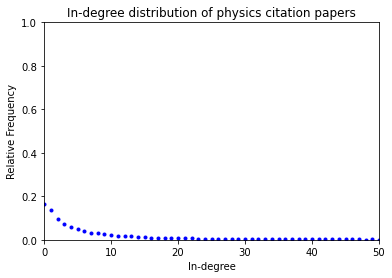

In [23]:
plt.plot(normallized_dist.keys(),normallized_dist.values(), 'b.')
plt.axis([0, 50, 0, 1])
title('In-degree distribution of physics citation papers');
plt.xlabel('In-degree')
plt.ylabel('Relative Frequency')

Text(0, 0.5, 'Fraction of papers')

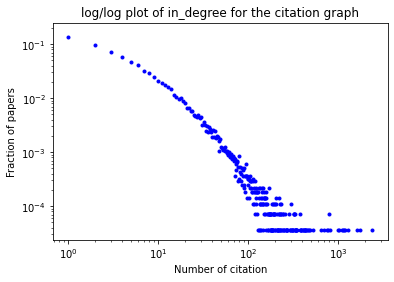

In [107]:
plt.loglog(normallized_dist.keys(), normallized_dist.values(), 'b.')
title('log/log plot of in_degree for the citation graph')
plt.xlabel('Number of citation')
plt.ylabel('Fraction of papers')

In [15]:
def convert_to_log(graph):
    log_dict ={}
    for key in graph:
        if key!=0:
            log_dict[log(key)] = log(graph[key])
    return log_dict

Text(0, 0.5, 'Fraction of papers (log base 10)')

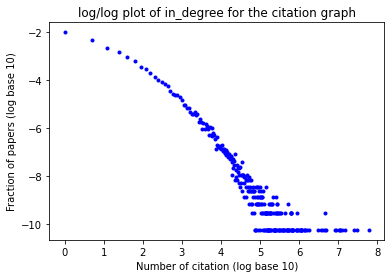

In [16]:
log_data = convert_to_log(normallized_dist)
plt.plot(log_data.keys(),log_data.values(), 'b.')
title('In-degree distribution of physics citation papers');
plt.xlabel('In-degree')
plt.ylabel('Fraction of Nodes')

Text(0, 0.5, 'Fraction of papers')

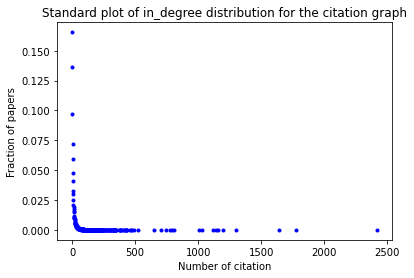

In [17]:
plt.plot(normallized_dist.keys(),normallized_dist.values(),'b.')
title('Standard plot of in_degree distribution for the citation graph')
plt.xlabel('Number of citation')
plt.ylabel('Fraction of papers')

In [19]:
import random

def make_random_graph(num_nodes, p):
    """
    Takes the number of nodes num_nodes and returns a dictionary
    corresponding to a complete directed graph with the specified
    number of nodes.
    """
    graph = {}
    if num_nodes < 1:
        return graph
    for node in range(0, num_nodes):
        neighbors = set([])
        for dummy_i in range(0, num_nodes):
            if dummy_i != node:
                a = random.random()
                if a < p:
                    neighbors.add(dummy_i)
        graph[node] = neighbors
    return graph

q2 = make_random_graph(10000, 0.1)
q2_dist = in_degree_distribution(q2)

In [20]:
q2_norm = normalize_distribution(q2_dist, 10000)

Text(0, 0.5, 'Fraction of Nodes')

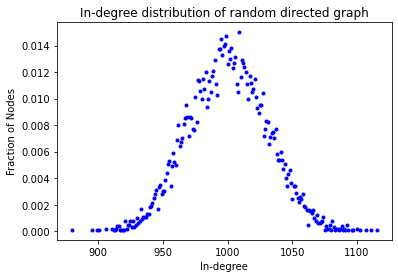

In [21]:
plt.plot(q2_norm.keys(), q2_norm.values(),'b.')
title('In-degree distribution of random directed graph');
plt.xlabel('In-degree')
plt.ylabel('Fraction of Nodes')

In [39]:
def make_graph(n,m):
    graph = make_complete_graph(m)
    return graph

In [40]:
test = make_graph(10,5)
print(test)

{0: {1, 2, 3, 4}, 1: {0, 2, 3, 4}, 2: {0, 1, 3, 4}, 3: {0, 1, 2, 4}, 4: {0, 1, 2, 3}}


In [47]:
def compute_out_degrees(digraph):
    count = 0   
    for node in digraph:
        count += len(digraph[node])
    count = count 
    return count

In [50]:
total_out = compute_out_degrees(citation_graph)
print(total_out)

352768


In [56]:
def compute_avg_indegrees(digraph):
    result = {}
    if digraph == {}:
            return result
    counter = 0
    for node in digraph:
        for dummy_node in digraph:
            if node in digraph[dummy_node]:
                counter += 1     
    return counter

In [57]:
total_in = compute_avg_indegrees(citation_graph)
print(total_in)

352768


In [99]:
class DPATrial:
    def __init__(seft, num_nodes):
        seft._num_nodes = num_nodes
        seft._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]
        
    def run_trial(seft, num_nodes):
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(seft._node_numbers))
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        seft._node_numbers.append(seft._num_nodes)
        seft._node_numbers.extend(list(new_node_neighbors))
        seft._num_nodes+=1
        return new_node_neighbors
    
def make_complete_graph(num_nodes):
        graph={}
        if num_nodes<1:
            return graph
        for node in range(0,num_nodes):
            neighbors = set([])
            for dummy_i in range(0,num_nodes):
                if dummy_i != node:
                    neighbors.add(dummy_i)
            graph[node] = neighbors
        return graph
    
def DPA(total_nodes ,m):
    graph = make_complete_graph(m)
    trial = DPATrial(m)
    for idx in range(m, total_nodes):
        new_node_neighbors = trial.run_trial(m)
        for node in new_node_neighbors:
            neighbors = graph[node] 
            neighbors.add(idx)
            graph[idx] = new_node_neighbors
    return graph

dpa_graph = DPA(28000, 13)

In [100]:
dpa_degree_distribution = in_degree_distribution(dpa_graph)

Text(0, 0.5, '% of nodes with in-degree')

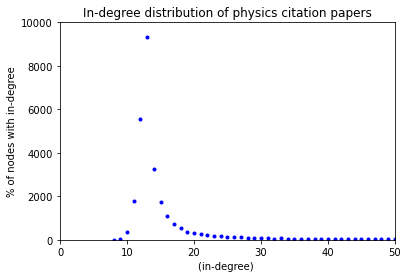

In [101]:
plt.plot(dpa_degree_distribution.keys(), dpa_degree_distribution.values(), 'b.')
plt.axis([0, 50, 0, 10000])

title('In-degree distribution of physics citation papers');
plt.xlabel('(in-degree) ')
plt.ylabel('% of nodes with in-degree')

In [102]:
normalized_dpa = normalize_distribution(dpa_degree_distribution, 28000)

Text(0, 0.5, 'ln(% of nodes with in-degree)')

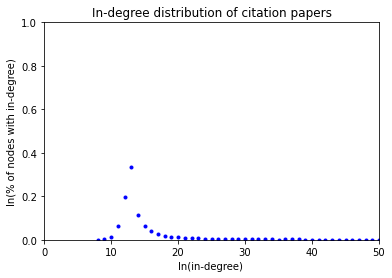

In [103]:
plt.plot(normalized_dpa.keys(), normalized_dpa.values(), 'b.')
plt.axis([0, 50, 0, 1])

title('In-degree distribution of citation papers');
plt.xlabel('ln(in-degree) ')
plt.ylabel('ln(% of nodes with in-degree)')

Text(0, 0.5, 'Fraction of Nodes')

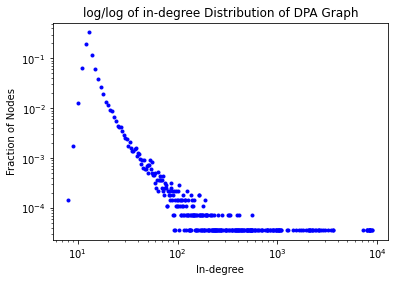

In [108]:
plt.loglog(normalized_dpa.keys(), normalized_dpa.values(), 'b.')

title('log/log of in-degree Distribution of DPA Graph');
plt.xlabel('In-degree')  #"$n_1$"
plt.ylabel('Fraction of Nodes')

Text(0, 0.5, 'ln(% of nodes with in-degree)')

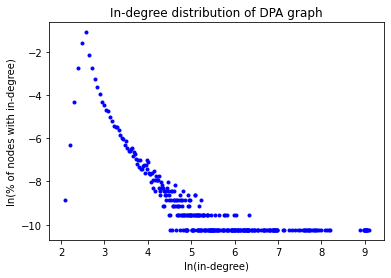

In [105]:
log_data_dpa = convert_to_log(normalized_dpa)
plt.plot(log_data_dpa.keys(),log_data_dpa.values(), 'b.')
title('In-degree distribution of DPA graph');
plt.xlabel('ln(in-degree)')  #"$n_1$"
plt.ylabel('ln(% of nodes with in-degree)')